# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

 # Read the data

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Data exploration

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


# Visualize the data

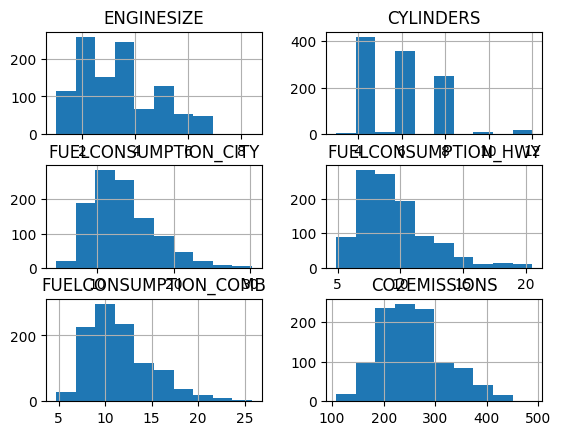

In [11]:
viz = cdf[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
viz.hist()
plt.show()

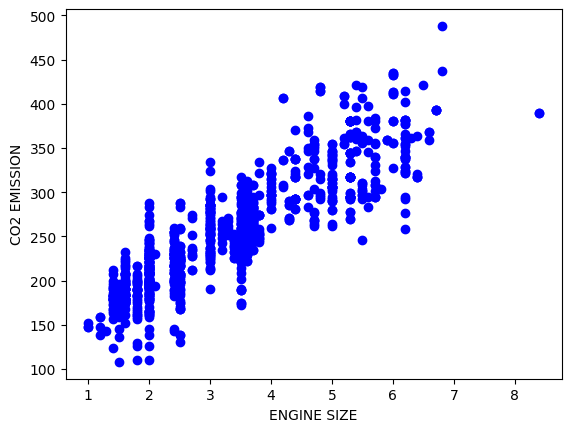

In [6]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"], color='blue')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSION")
plt.show()

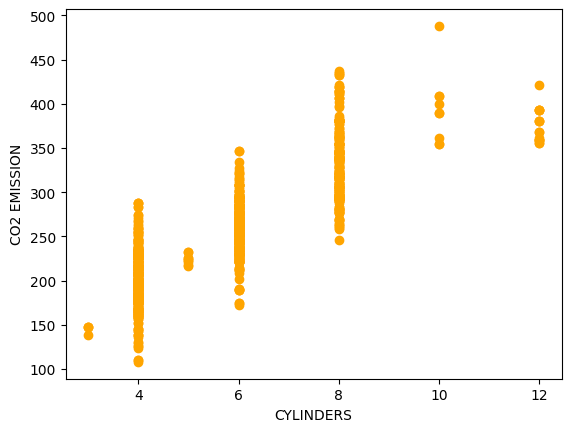

In [7]:
plt.scatter(cdf["CYLINDERS"], cdf["CO2EMISSIONS"], color='orange')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 EMISSION")
plt.show()

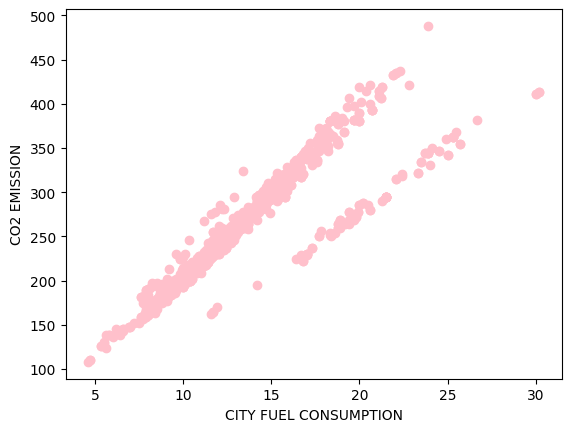

In [12]:
plt.scatter(cdf["FUELCONSUMPTION_CITY"], cdf["CO2EMISSIONS"], color='pink')
plt.xlabel("CITY FUEL CONSUMPTION")
plt.ylabel("CO2 EMISSION")
plt.show()

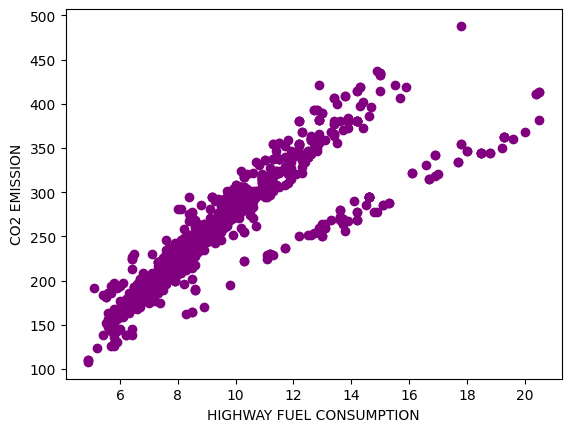

In [13]:
plt.scatter(cdf["FUELCONSUMPTION_HWY"], cdf["CO2EMISSIONS"], color='purple')
plt.xlabel("HIGHWAY FUEL CONSUMPTION")
plt.ylabel("CO2 EMISSION")
plt.show()

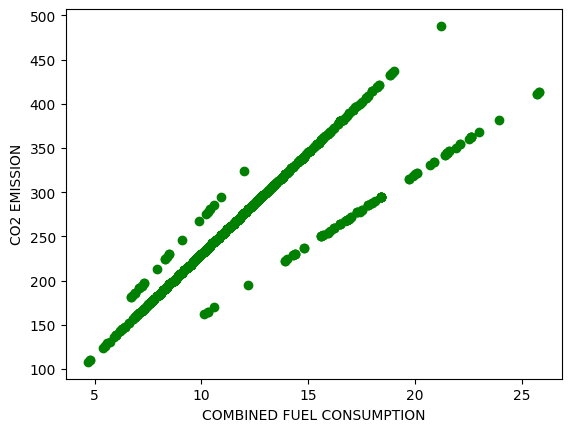

In [14]:
plt.scatter(cdf["FUELCONSUMPTION_COMB"], cdf["CO2EMISSIONS"], color='green')
plt.xlabel("COMBINED FUEL CONSUMPTION")
plt.ylabel("CO2 EMISSION")
plt.show()

# Regression  >>>> data separation

In [18]:
msk = np.random.rand(len(df)) < 0.8
train_data = cdf[msk]
test_data = cdf[~msk]
print(msk)
print(~msk)
print(cdf)
print(train_data)
print(test_data)

[ True  True False ...  True  True  True]
[False False  True ... False False False]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0            2.0          4                   9.9                  6.7   
1            2.4          4                  11.2                  7.7   
2            1.5          4                   6.0                  5.8   
3            3.5          6                  12.7                  9.1   
4            3.5          6                  12.1                  8.7   
...          ...        ...                   ...                  ...   
1062         3.0          6                  13.4                  9.8   
1063         3.2          6                  13.2                  9.5   
1064         3.0          6                  13.4                  9.8   
1065         3.2          6                  12.9                  9.3   
1066         3.2          6                  14.9                 10.2   

      FUELCONSUMPTION_COMB 

# Multiple Regression Model

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_data[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
train_y = np.asanyarray(train_data[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)
print('coefficient: ', regr.coef_)
print('intercept: ', regr.intercept_)

coefficient:  [[ 9.8860147   7.32315415 10.20726252]]
intercept:  [62.81654043]


# Evaluation

In [21]:
test_x = np.asanyarray(test_data[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
test_y = np.asanyarray(test_data[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)

print("Residual Sum of Squares: ", np.mean((test_y_ - test_y)**2))
print("Variance Score:", regr.score(test_x, test_y))

Residual Sum of Squares:  569.9621345554369
Variance Score: 0.866840386809119
